# 01. Market Expectations In The Cross-Section Of Present Values

TBD

In [1]:
import numpy as np
import pandas as pd
import sys

from matplotlib import pyplot as plt
from settings import config
from pathlib import Path
import load_data
import regressions
import pull_CRSP_index
import pull_ken_french_data
import pull_fred

# Load environment variables
DATA_DIR = Path(config("DATA_DIR"))
OUTPUT_DIR = Path(config("OUTPUT_DIR"))
WRDS_USERNAME = config("WRDS_USERNAME")
START_DATE = config("START_DATE")
END_DATE = config("END_DATE")

## Prep Data

### Step 1: Fama-French Data

In [2]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")

/tmp/ipykernel_33952/3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
/tmp/ipykernel_33952/3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
/tmp/ipykernel_33952/3288387857.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  bm_6_portfolios = web.DataReader("6_Portfolios_2x3", "famafrench")
/tmp/ipykernel_33952/3288387857.py:1: FutureWarning: The argument 'date_parser' is

In [4]:
print(bm_6_portfolios['DESCR'])

6 Portfolios 2x3
----------------

This file was created by CMPT_ME_BEME_OP_INV_RETS using the 202412 CRSP database. It contains value- and equal-weighted returns for portfolios formed on ME and BEME. The portfolios are constructed at the end of June. BEME is book value at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Annual returns are from January to December. Missing data are indicated by -99.99 or -999. The break points include utilities and include financials. The portfolios include utilities and include financials. Copyright 2024 Eugene F. Fama and Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (58 rows x 6 cols)
  1 : Average Equal Weighted Returns -- Monthly (58 rows x 6 cols)
  2 : Average Value Weighted Returns -- Annual (5 rows x 6 cols)
  3 : Average Equal Weighted Returns -- Annual (5 rows x 6 cols)
  4 : Number of Firms in Portfolios (58 rows x 6 cols)
  5 : Average Market Cap (58 rows x 6 c

In [5]:
bm_6_portfolios[6].head()

,SMALL LoBM,ME1 BM2,SMALL HiBM,BIG LoBM,ME2 BM2,BIG HiBM
Date,,,,,,
2020-03,0.1810,0.5313,1.1804,0.1574,0.5496,1.0957
2020-04,0.1813,0.5308,1.1705,0.1569,0.5448,1.0928
2020-05,0.1792,0.5297,1.1856,0.1561,0.5449,1.0953
2020-06,0.1792,0.5280,1.1877,0.1560,0.5418,1.1002
2020-07,0.1642,0.4626,1.1351,0.1252,0.4527,0.8969


### Step 2: CRSP Market Capitalization Weighted Index Data

In [6]:
crsp = pull_CRSP_index.pull_crsp_value_weighted_index()

Loading library list...
Done
Approximately 1189 rows in crsp.msi.
CRSP.msi Table Columns: ['name', 'nullable', 'type', 'comment']
CRSP value-weighted index data saved to crsp_value_weighted_index.csv
CSV file saved to /home/jared/Cloud_Storage/OneDrive_jszajkowski@uchicago.edu/Courses/FINM 32900 1 (Winter 2025) Full-Stack Quantitative Finance/Project/finm32900_project_group6/_data/crsp_value_weighted_index.csv


In [7]:
crsp_loaded = load_data.load_crsp_index()
crsp_loaded

,date,value_weighted_return
0,1930-02-01,0.058407
1,1930-03-01,0.028242
2,1930-04-01,0.074631
3,1930-05-01,-0.020541
4,1930-06-01,-0.014010
...,...,...
1123,2023-09-01,-0.020608
1124,2023-10-01,-0.047391
1125,2023-11-01,-0.028865
1126,2023-12-01,0.092053


### Step 3: Risk-Free Rate Data

In [8]:
rf = pull_fred.pull_fred()
rf

,GDP,CPIAUCNS,GDPC1,DPCREDIT,EFFR,OBFR,SOFR,DFEDTARU,DFEDTARL,WALCL,...,GFDEBTN,WTREGEN,RRPONTSYAWARD,RRPONTSYD,RPONTSYD,WSDONTL,TB3MS,Gen_IORB,ONRRP_CTPY_LIMIT,ONRP_AGG_LIMIT
DATE,,,,,,,,,,,,,,,,,,,,,
1930-01-01,NaN,17.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-02-01,NaN,17.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-03-01,NaN,16.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-04-01,NaN,17.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-05-01,NaN,16.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,NaN,NaN,NaN,5.5,5.33,5.32,5.40,5.5,5.25,7712.781,...,NaN,731.405,5.3,829.573,0.0,38.439,NaN,5.4,160.0,500.0
2023-12-29,NaN,NaN,NaN,5.5,5.33,5.32,5.38,5.5,5.25,7712.781,...,NaN,731.405,5.3,1018.483,0.0,38.439,NaN,5.4,160.0,500.0
2023-12-30,NaN,NaN,NaN,5.5,NaN,5.32,NaN,5.5,5.25,7712.781,...,NaN,731.405,5.3,NaN,NaN,38.439,NaN,5.4,160.0,500.0


In [9]:
rf_monthly = load_data.load_fred_data()
rf_monthly

DATE
1934-01-01    0.000600
1934-02-01    0.000517
1934-03-01    0.000200
1934-04-01    0.000125
1934-05-01    0.000133
                ...   
2023-09-01    0.004433
2023-10-01    0.004450
2023-11-01    0.004392
2023-12-01    0.004367
2024-01-01    0.004350
Name: TB3MS, Length: 1081, dtype: float64

### Step 4: Excess Returns

In [10]:
ex_ret = load_data.load_and_compute_excess_returns()
ex_ret

1934-01-01    0.017276
1934-02-01    0.126262
1934-03-01   -0.024487
1934-04-01    0.004300
1934-05-01   -0.018478
                ...   
2023-09-01   -0.025041
2023-10-01   -0.051841
2023-11-01   -0.033257
2023-12-01    0.087686
2024-01-01    0.049254
Length: 1081, dtype: float64

# Run Regressions

In [11]:
import importlib
importlib.reload(load_data)

<module 'load_data' from '/home/jared/Cloud_Storage/OneDrive_jszajkowski@uchicago.edu/Courses/FINM 32900 1 (Winter 2025) Full-Stack Quantitative Finance/Project/finm32900_project_group6/src/load_data.py'>

In [12]:
# def regress():
#     portfolio_datasets = {
#         "6-Portfolios": "6_Portfolios_2x3",
#         "25-Portfolios": "25_Portfolios_5x5",
#         "100-Portfolios": "100_Portfolios_10x10"
#     }
#     results = {}
#     for label, dataset_name in portfolio_datasets.items():
#         print(f"\nProcessing {label} Data")
#         in_sample = regressions.run_in_sample_pls(dataset_name, weighting="value-weighted", h=1)
#         recursive = regressions.run_recursive_forecast(dataset_name, weighting="value-weighted", h=1)
#         regressions.display_results(label, in_sample, recursive)
#         results[label] = {"in_sample": in_sample, "recursive": recursive}
#     return results

# regress()

# Regressions for B/M ratios


Processing 100-Portfolios Data
Aligned data from 1934-01-01 to 2024-01-01
Number of dates: 1081
Date range: 1934-01-01 to 1980-01-01
Number of dates: 553
Date range: 1934-01-01 to 1980-01-01
Number of dates: 553
First-Stage Estimated Loadings (phi_i):
SMALL LoBM: -7.0762
ME1 BM2: 20.9222
ME1 BM3: 1.2057
ME1 BM4: 6.9737
ME1 BM5: -1.2110
ME1 BM6: 1.2618
ME1 BM7: 1.2825
ME1 BM8: 2.3633
ME1 BM9: 2.5695
SMALL HiBM: 17.5764
ME2 BM1: -29.9051
ME2 BM2: 6.9411
ME2 BM3: -13.3862
ME2 BM4: 0.6238
ME2 BM5: 0.7423
ME2 BM6: 1.1756
ME2 BM7: 1.3614
ME2 BM8: 1.7687
ME2 BM9: 2.5816
ME2 BM10: 15.3143
ME3 BM1: -32.6506
ME3 BM2: -25.6305
ME3 BM3: 0.5603
ME3 BM4: 0.7768
ME3 BM5: 0.7686
ME3 BM6: 0.9874
ME3 BM7: 1.4264
ME3 BM8: 1.5544
ME3 BM9: 2.5652
ME3 BM10: 7.6243
ME4 BM1: -32.6708
ME4 BM2: 0.5235
ME4 BM3: 0.5798
ME4 BM4: 0.6181
ME4 BM5: 0.6876
ME4 BM6: 0.9947
ME4 BM7: 1.3473
ME4 BM8: 1.7137
ME4 BM9: 2.4456
ME4 BM10: 4.8790
ME5 BM1: 0.3586
ME5 BM2: 0.4357
ME5 BM3: 0.5272
ME5 BM4: 0.5955
ME5 BM5: 0.6842
ME5

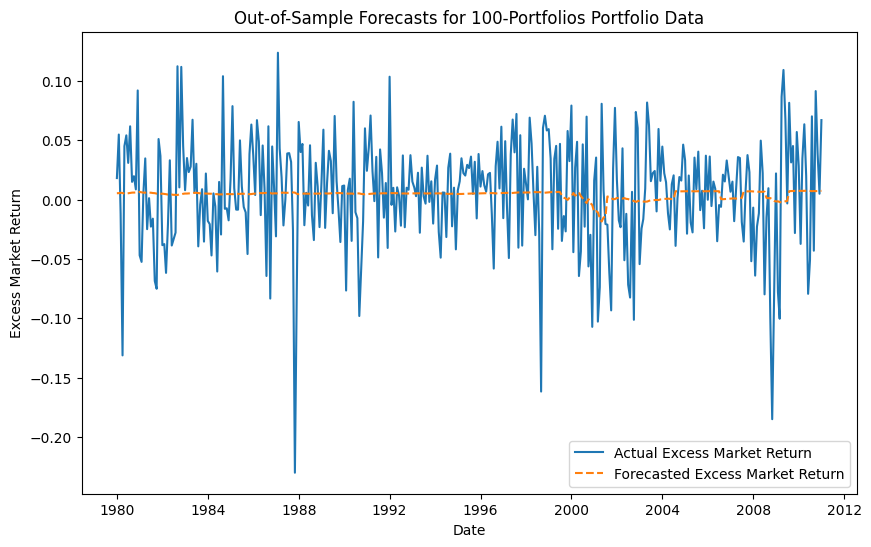

{'100-Portfolios': {'in_sample': {'phi': {'SMALL LoBM': -7.076193279656284,
    'ME1 BM2': 20.92217932601229,
    'ME1 BM3': 1.2056585145867738,
    'ME1 BM4': 6.973709599112916,
    'ME1 BM5': -1.211032446537219,
    'ME1 BM6': 1.2617826719202827,
    'ME1 BM7': 1.28250595115595,
    'ME1 BM8': 2.3632709199119946,
    'ME1 BM9': 2.569516516866226,
    'SMALL HiBM': 17.576374459016222,
    'ME2 BM1': -29.905146882033435,
    'ME2 BM2': 6.941093049932922,
    'ME2 BM3': -13.386236933329656,
    'ME2 BM4': 0.6238099006394381,
    'ME2 BM5': 0.7422509626686863,
    'ME2 BM6': 1.1756122173831924,
    'ME2 BM7': 1.3614037703357915,
    'ME2 BM8': 1.7686874343621168,
    'ME2 BM9': 2.581645803361922,
    'ME2 BM10': 15.314251756526692,
    'ME3 BM1': -32.65059484391868,
    'ME3 BM2': -25.630474761134742,
    'ME3 BM3': 0.560305450994405,
    'ME3 BM4': 0.7767935577938172,
    'ME3 BM5': 0.7686183516080167,
    'ME3 BM6': 0.9873851880318929,
    'ME3 BM7': 1.4264332285899393,
    'ME3 BM8': 

In [13]:
def regress():
    portfolio_datasets = {
        # "6-Portfolios": "6_Portfolios_2x3",
        # "25-Portfolios": "25_Portfolios_5x5",
        "100-Portfolios": "100_Portfolios_10x10"
    }
    results = {}
    for label, dataset_name in portfolio_datasets.items():
        print(f"\nProcessing {label} Data")
        in_sample = regressions.run_in_sample_pls(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            end_date='1980-01-01')
        recursive = regressions.run_recursive_forecast(
            dataset_name=dataset_name, 
            weighting="BE_FYt-1_to_ME_June_t", 
            h=1, 
            start_train_date='1934-02-01', 
            end_train_date='1980-01-01',
            end_forecast_date='2011-01-01')
        regressions.display_results(label, in_sample, recursive)
        results[label] = {"in_sample": in_sample, "recursive": recursive}
    return results

regress()